# Classifying newswires: Multiclass Classification

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [0]:
train_data[7]

#### Decoding newswires back to text

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[7]

3

## Preparing the data

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### One-Hot encoding labels

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## Building network

In [0]:
from keras import models
from keras import layers

kaynet = models.Sequential()
kaynet.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
kaynet.add(layers.Dense(64, activation='relu'))
kaynet.add(layers.Dense(46, activation='softmax'))

### Compiling the model

In [0]:
kaynet.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validation set

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Training the model

In [26]:
history = kaynet.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 314us/step - loss: 2.5314 - acc: 0.4956 - val_loss: 1.7232 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 1s 159us/step - loss: 1.4482 - acc: 0.6873 - val_loss: 1.3477 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.0981 - acc: 0.7650 - val_loss: 1.1722 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.8718 - acc: 0.8161 - val_loss: 1.0796 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 154us/step - loss: 0.7050 - acc: 0.8468 - val_loss: 0.9852 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.5683 - acc: 0.8791 - val_loss: 0.9412 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.4609 - acc: 0.9037 - val_loss: 0.9094 - val_acc: 0.8020


## Plotting

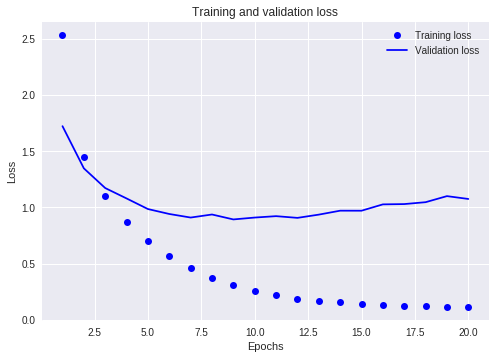

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

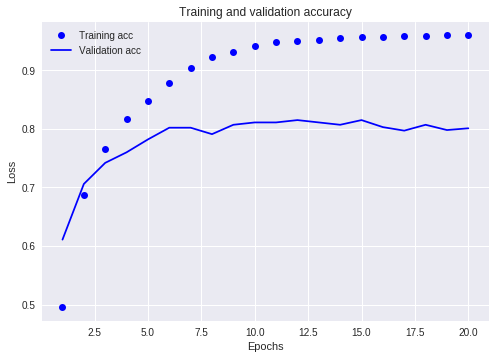

In [28]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch

In [29]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 178us/step - loss: 2.5306 - acc: 0.5241 - val_loss: 1.6809 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 155us/step - loss: 1.3717 - acc: 0.7126 - val_loss: 1.2794 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 1s 155us/step - loss: 1.0148 - acc: 0.7799 - val_loss: 1.1334 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 162us/step - loss: 0.7986 - acc: 0.8259 - val_loss: 1.0516 - val_acc: 0.7610
Epoch 5/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.6402 - acc: 0.8629 - val_loss: 0.9742 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 156us/step - loss: 0.5127 - acc: 0.8923 - val_loss: 0.9099 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.4129 - acc: 0.9137 - val_loss: 0.8949 - val_acc: 0.8210
Epoch 8

In [30]:
results

[1.021673420339637, 0.7782724844698171]

## Prediction

In [0]:
predictions = model.predict(x_test)